In [1]:
from cogs.claire.claire_query import ClaireQuery
from cogs.claire.ml.claire_ml import insert_query, get_queries, unique, insert_queries
import pandas as pd
from sklearn.model_selection import train_test_split

query = ClaireQuery(
    owner_id=1,
    zip_code=20817,
    state="MD",
    channel=1,
    site="washingtondc",
    keywords="chair",
    #keywords="couch, sofa, iphone, macbook, furniture, lamp, nintendo, switch, gaming monitor",
    budget=1000,
    has_image=True,
    lat=38.989471,
    lon=-77.137009
)

listings = query.search()

Connected to DB


In [3]:
print(len(listings))
for listing in listings:
    print(listing.__dict__)
    break

40
{'source': 'Craigslist', 'id': '7615365028', 'name': 'Straight Back Heavy Wood Country Chair', 'url': 'https://baltimore.craigslist.org/fuo/d/clarksville-straight-back-heavy-wood/7615365028.html', 'price': '15', 'images': ['//map8.craigslist.org/t09/13/2344/3124.png', '//map9.craigslist.org/t09/13/2345/3124.png', '//map7.craigslist.org/t09/13/2344/3123.png', '//map8.craigslist.org/t09/13/2345/3123.png', '//map9.craigslist.org/t09/13/2344/3125.png', '//map0.craigslist.org/t09/13/2345/3125.png'], 'body': 'Good Quality chair, heavy wood, has a small rip on the cushion, that can be repaired.', 'attributes': ['condition: like new', 'size / dimensions: 48"'], 'posted': datetime.datetime(2023, 4, 28, 13, 9)}


In [8]:
final_listings = get_queries()
df = pd.DataFrame.from_dict(final_listings)
df

,_id,name,details,label
0,642c421c2a089659a0ce0a56,Room & Board Modern Two Seat Sofa (Was 1699),=============================================\...,1
1,642c421c2a089659a0ce0a57,Interior Define Maxwell Sofa (Was 1895),=============================================\...,1
2,642c421c2a089659a0ce0a58,Brand new couch,Beautiful brand new linen couch. Unpacked and...,0
3,642c421c2a089659a0ce0a59,"Couch - light grey fabric, super clean",ahdjxn,0
4,642c421c2a089659a0ce0a5a,FS: World Market Couch and Chair,We are selling this couch and chair to make ro...,0
...,...,...,...,...
416,642c421c2a089659a0ce0bf6,24” Gaming Monitor,Only used once\nComes with all cords\nNo origi...,0
417,642c421c2a089659a0ce0bf7,Viewsonic 24” 1080 P Gaming Monitor,Brand new everything works fine have no need f...,0
418,642c421c2a089659a0ce0bf8,Dell 144Hz Gaming Monitor,"FHD 24 Inch Monitor - 1ms Response Time, LED E...",0
419,642d95094af87d47e0ed02ed,Futon/Couch,Available today,0


In [7]:
df.label.sum()

94

In [14]:
X = df.details
y = df.label

In [104]:
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

X = np.array([x if x else '' for x in X])

scores = {}
for model in [MultinomialNB, SVC, BernoulliNB, RandomForestClassifier, MLPClassifier, GradientBoostingClassifier, KNeighborsClassifier, LogisticRegression]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.65, random_state=328)

    # Define the pipeline
    text_clf = Pipeline(
        [
            ('vect', CountVectorizer(token_pattern=r"(?u)\b\w+\b|[^\s]")),
            ('clf', model())
        ]
    )

    # Train the model
    text_clf.fit(X_train, y_train)

    # Test the model
    predicted_labels = text_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predicted_labels)
    precision = precision = precision_score(y_test, predicted_labels, pos_label=1)
    cm = confusion_matrix(y_test, predicted_labels)

    scores[model.__name__] = { 'accuracy' : accuracy, 'precision' : precision, 'cm': cm }


In [128]:
num = 1
thing = np.array([listings[num].details])
prob = text_clf.predict_proba(thing)
print(listings[num].details)
print(text_clf.predict(thing)[0])
print(round(list(prob[0])[1], 3))

==== SAVE UP TO 90%! PRICES UPDATED DAILY! ====
Learn more at:
https://kaiyo.com/pottery-barn-pottery-barn-cardiff-tufted-upholstered-armchair-with-nailheads-2/?utm_source=craigslist

POTTERY BARN CARDIFF TUFTED UPHOLSTERED ARMCHAIR WITH NAILHEADS

ORIGINAL PRICE: 1549
BRAND: Pottery Barn
PRODUCT LABEL: 358968
DIMENSIONS: 38 W x 40 D x 35 H inches

-Seat Height: 19”
-Seat Depth: 24”

BUY WITH KAIYO
Kaiyo is an online marketplace for great discounts on pre-owned furniture from top brands. Every piece is inspected, cleaned, and ready for delivery.

See our reviews on Yelp:
https://www.yelp.com/biz/kaiyo-washington-dc

PHOTOGRAPHS
These are actual photos of the item - not stock images. We make sure to capture any imperfections we find so you know exactly what you'll get. Visit our site to zoom in on the finer details.

DELIVERY
Our white-glove delivery team will bring and setup your furniture 7 days a week so you can relax. We service the Baltimore and Washington D.C. metro areas, as well

MultinomialNB - Acc: 0.959 | Prec: 1.0


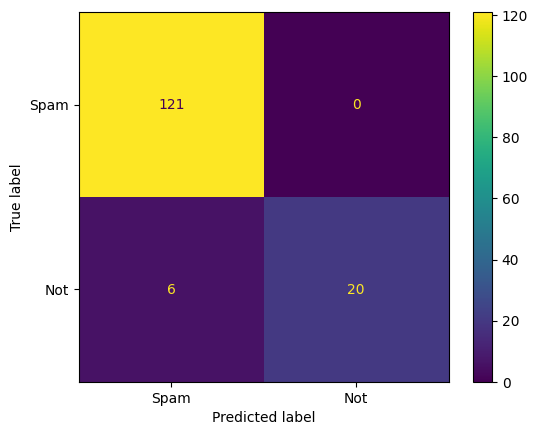

SVC - Acc: 0.864 | Prec: 0.875


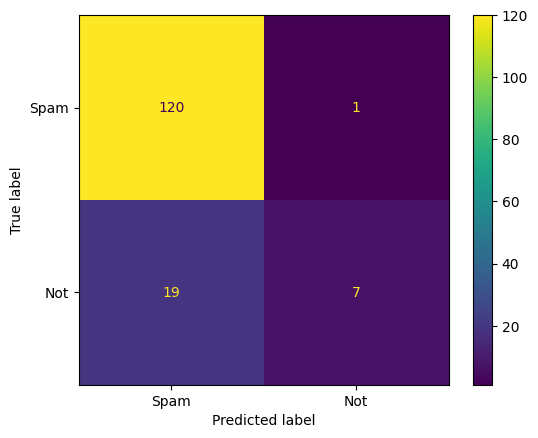

LogisticRegression - Acc: 0.973 | Prec: 0.958


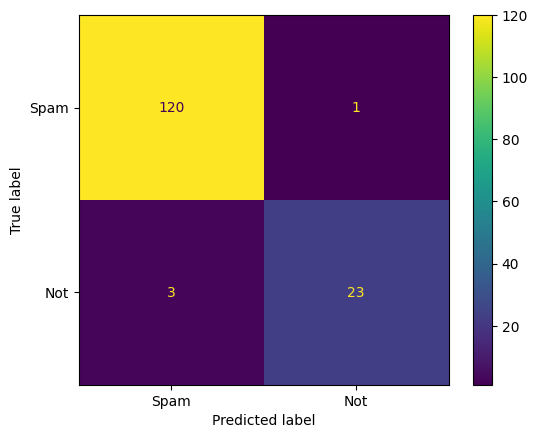

BernoulliNB - Acc: 0.878 | Prec: 0.9


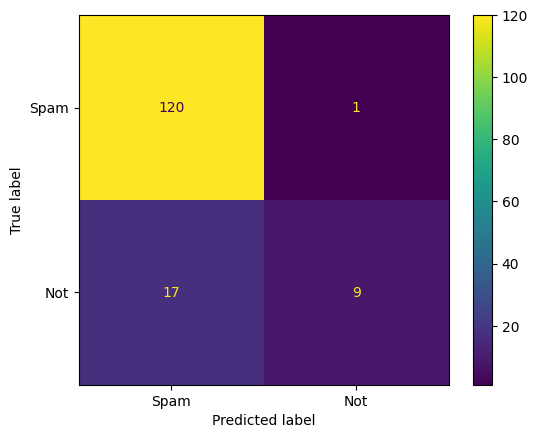

RandomForestClassifier - Acc: 0.952 | Prec: 0.952


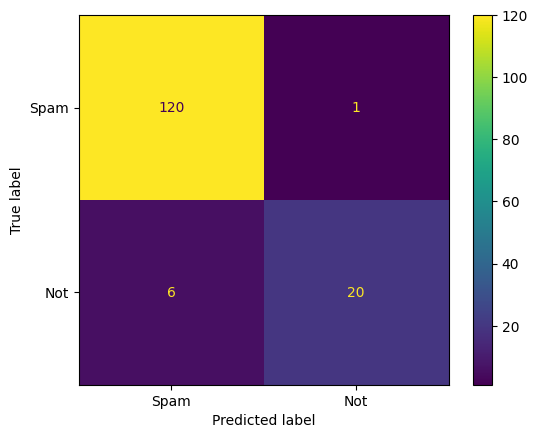

MLPClassifier - Acc: 0.98 | Prec: 1.0


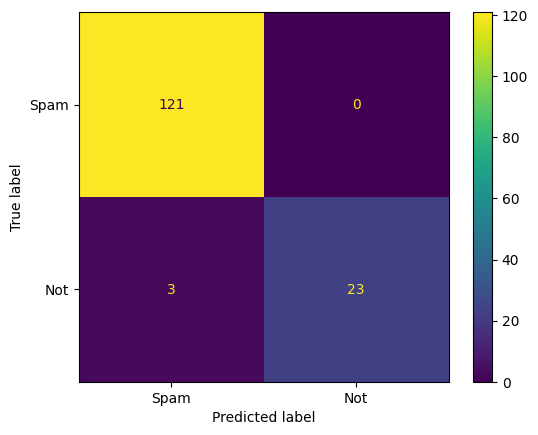

GradientBoostingClassifier - Acc: 0.939 | Prec: 0.815


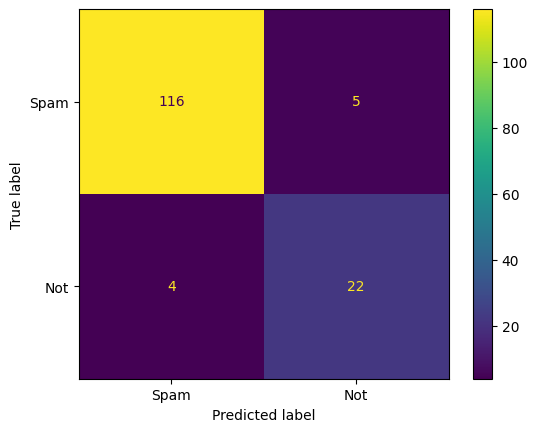

KNeighborsClassifier - Acc: 0.878 | Prec: 0.643


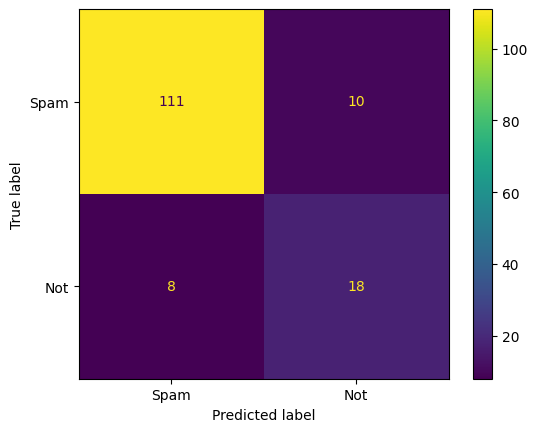

In [89]:
for k, v in scores.items():
    print(f"{k} - Acc: {round(v['accuracy'], 3)} | Prec: {round(v['precision'],3)}")
    disp = ConfusionMatrixDisplay(confusion_matrix=v['cm'], display_labels=['Spam', 'Not'])
    disp.plot()
    plt.show()

In [103]:
import tkinter as tk
import webbrowser
from PIL import Image, ImageTk
import urllib.request
from io import BytesIO

items = listings
current_item = 342
current_image = None

def on_button1_click(kind):
    global current_item, current_image

    item = items[current_item]

    db = {
        'name': item.name,
        'details': item.details,
        'label': kind
    }
    insert_query(db)

    nom = items[current_item].name
    noms = [item.name for item in items[0: current_item]]
    while True:
        noms = [item.name for item in items[0: current_item]]
        current_item = (current_item + 1) % len(items)
        nom = items[current_item].name
        if nom not in noms:
            break
        

    next_item = items[current_item]
    
    get_photo(next_item.main_photo())
    photo.config(image=current_image)
    label.config(text=f"{next_item.name} {current_item+1}/{len(items)}")
    url.config(text=next_item.url)
    paragraph.config(text=next_item.details)

def get_photo(url):
    global current_image

    with urllib.request.urlopen(url) as u:
        raw_data = u.read()
    image = Image.open(BytesIO(raw_data))
    max_width = 500
    max_height = 500
    image.thumbnail((max_width, max_height))
    current_image = ImageTk.PhotoImage(image)

def on_button3_click():
    global current_item
    item = items[current_item]
    webbrowser.open_new(item.url)

# Create a window
window = tk.Tk()

# Set the title of the window
window.title("My Window")

# Set the size of the window
window.geometry("1920x1080")

canvas = tk.Canvas(window)

scrollbar = tk.Scrollbar(window, orient="vertical", command=canvas.yview)
canvas.configure(yscrollcommand=scrollbar.set)
frame = tk.Frame(canvas)

paragraph = tk.Label(frame, text=items[current_item].details, wraplength=650)
paragraph.pack()

# Add some text to the window
label = tk.Label(window,  text=items[current_item].name)
label.pack()

photo = tk.Label(window, image=current_image)
photo.pack()

url = tk.Label(window, text=items[current_item].url)
url.pack()

# Add the buttons to the window
button1 = tk.Button(window, text="Spam", command=lambda: on_button1_click(1))
button1.pack()

button2 = tk.Button(window, text="Not spam", command=lambda: on_button1_click(0))
button2.pack()

button3 = tk.Button(window, text="View site", command=lambda: on_button3_click())
button3.pack()

canvas.create_window((0, 0), window=frame, anchor="nw")

# Resize the canvas scrollable area
frame.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

# Add the canvas and scrollbar to the window
canvas.pack(side="left", fill="both", expand=True)
scrollbar.pack(side="right", fill="y")

# Start the event loop
window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\sales\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\sales\AppData\Local\Temp\ipykernel_21412\1988290479.py", line 89, in <lambda>
    button2 = tk.Button(window, text="Not spam", command=lambda: on_button1_click(0))
                                                                 ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sales\AppData\Local\Temp\ipykernel_21412\1988290479.py", line 35, in on_button1_click
    get_photo(next_item.main_photo())
  File "C:\Users\sales\AppData\Local\Temp\ipykernel_21412\1988290479.py", line 44, in get_photo
    with urllib.request.urlopen(url) as u:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sales\AppData\Local\Programs\Python\Python311\Lib\urllib\request.py", line 216, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^

In [1]:
url = "http://washingtondc.craigslist.org/search/sss?searchNearby=1&query=couch&max_price=200&hasPic=1&postal=20817&search_distance=20&postedToday=1&bundleDuplicates=1&min_price=5&sort=date&s=0"